In [10]:
import pandas as pd
#import matplotlib.pyplot as plt

df = pd.read_csv("heart_rate.csv")

df

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359
...,...,...,...,...
1795,103.7900,98.6842,NaN,NaN
1796,101.6230,98.6842,NaN,NaN
1797,99.5679,99.0005,NaN,NaN
1798,99.1835,99.3273,NaN,NaN


<Axes: >

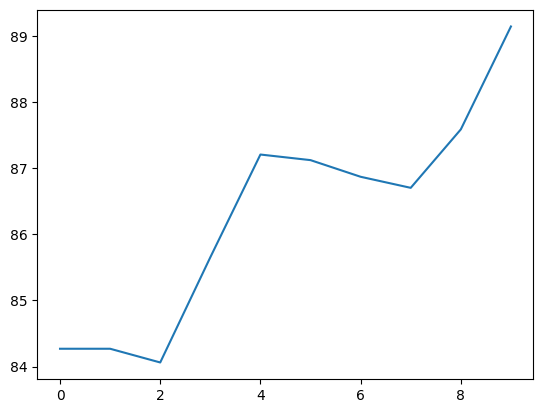

In [62]:
rng = 10

df["T1"][:rng].plot()

In [63]:
import numpy as np

t1 = df["T1"].values[:rng]
frequencies = np.fft.rfft(t1)
frequencies

array([ 8.62904600e+02+0.j        , -3.61131402e+00+7.0240794j ,
        4.66520375e-01+6.41522827j, -2.07703598e+00+1.62737408j,
       -3.43307037e+00+0.70923921j, -2.89780000e+00+0.j        ])

In [57]:
type(frequencies[1])

numpy.complex128

In [64]:
import sympy as sp 

t = sp.symbols("t")
N = len(frequencies)
X = sp.symbols("X0:%d" % N)

inverse_fft = 0

for k in range(N):
    inverse_fft += np.real(frequencies[k]) * sp.cos(2 * sp.pi * k * t/N) +  np.imag(frequencies[k])*sp.I * sp.sin(2 * sp.pi * k * t/N)

inverse_fft

7.02407939730086*I*sin(pi*t/3) + 6.41522827414952*I*sin(2*pi*t/3) + 1.62737407590068*I*sin(pi*t) + 0.70923920721599*I*sin(4*pi*t/3) - 3.61131402138076*cos(pi*t/3) + 0.466520374680387*cos(2*pi*t/3) - 2.07703597861924*cos(pi*t) - 3.4330703746804*cos(4*pi*t/3) - 2.89780000000002*cos(5*pi*t/3) + 862.9046

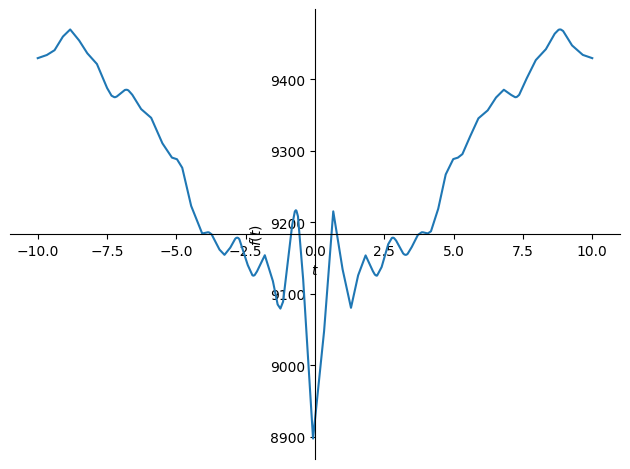

In [60]:
sp.plot(sp.re(inverse_fft))

In [47]:
inverse_discrete = []
for i in range(10):
    inverse_discrete.append(inverse_fft.subs(t, i)) 

In [53]:
np.fft.irfft(frequencies)

array([84.2697, 84.2697, 84.0619, 85.6542, 87.2093, 87.1246, 86.8726,
       86.7052, 87.5899, 89.1475])

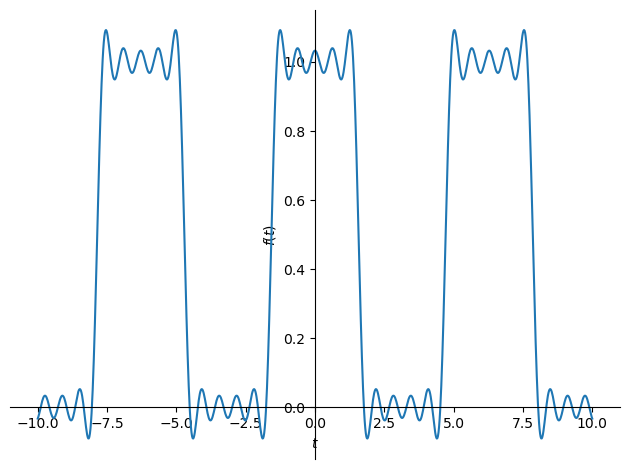

In [2]:
import sympy as sp

def partial_sum(n: int):
	t = sp.symbols("t")
	approximation = 0.5
	for k in range(1, n):
		approximation += ((2 * sp.sin((k*sp.pi)/2))/(k*sp.pi))*sp.cos(k*t)
		
	return approximation

p_10 = partial_sum(10)
p_50 = partial_sum(50)
p_500 = partial_sum(500)

sp.plot(p_10) 